<a href="https://colab.research.google.com/github/Nuthan03/NN_Classification/blob/main/NN_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

A few types of classification problems:

*   Binary classification
*   Multiclass clasification
*   Multilabel classification



## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


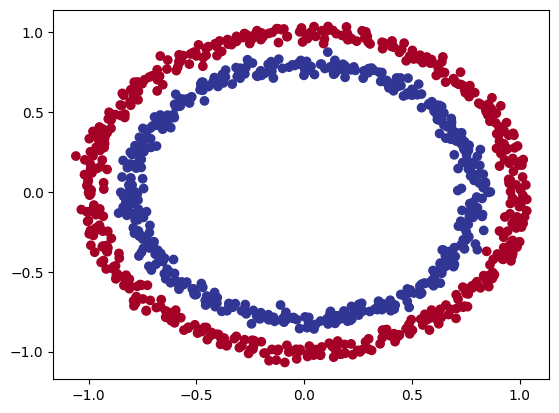

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(x), len(y)

(1000, 1000)

In [8]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

In [9]:
import tensorflow as tf


In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 7ms/step - loss: 4.1926 - accuracy: 0.4930
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 3.6609 - accuracy: 0.5140
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 1.3434 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7105 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.4980


In [11]:
model.fit(x, y, epochs=200, verbose=0)
model.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model.fit(x, y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 4.3402 - accuracy: 0.4140


[4.34024715423584, 0.414000004529953]

## Improving our model

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5100


[0.6965572834014893, 0.5099999904632568]

In [16]:
import numpy as np

In [17]:

def plot_dicision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stacks 2D arrays together

  # Make prediction using the trained model
  y_preds = model.predict(x_in)

  # Check for multiclass
  if model.output_shape[-1] > 1: # Checks the final dimension of the model's output_shape
    print("doing multi-class classfication")
    # We have to reshape our predictions to get them ready for plotting
    y_preds = np.argmax(y_preds, axis=1).reshape(xx.shape)
  else:
    print("doing binary classfication")
    y_preds = np.round(np.max(y_preds, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_preds, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classfication


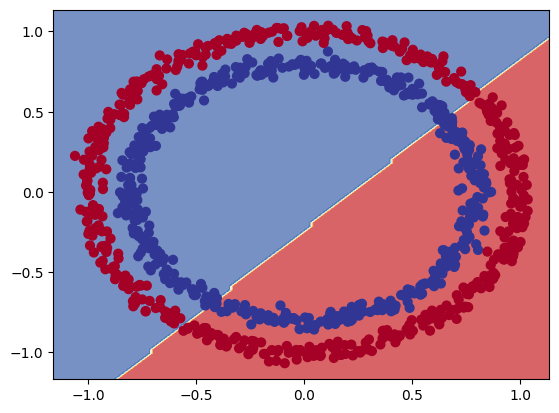

In [18]:
plot_dicision_boundary(model_3, x, y)

In [19]:
# Let's see if we can use our model can be used for a regression problem

tf.random.set_seed(42)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into train and test split
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model
model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 597.0303 - mae: 597.0303
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 502.3525 - mae: 502.3525
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 412.7410 - mae: 412.7410
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 321.2980 - mae: 321.2980
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 227.5606 - mae: 227.5606
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 127.2687 - mae: 127.2687
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1334 - mae: 53.1334
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 72.0372 - mae: 72.0372
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 69.4839 - mae: 69.4839
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 48.1454 - mae: 48.1454
Epoch 11/100
5/5 [=============================

2/2 [==============================] - 0s 9ms/step


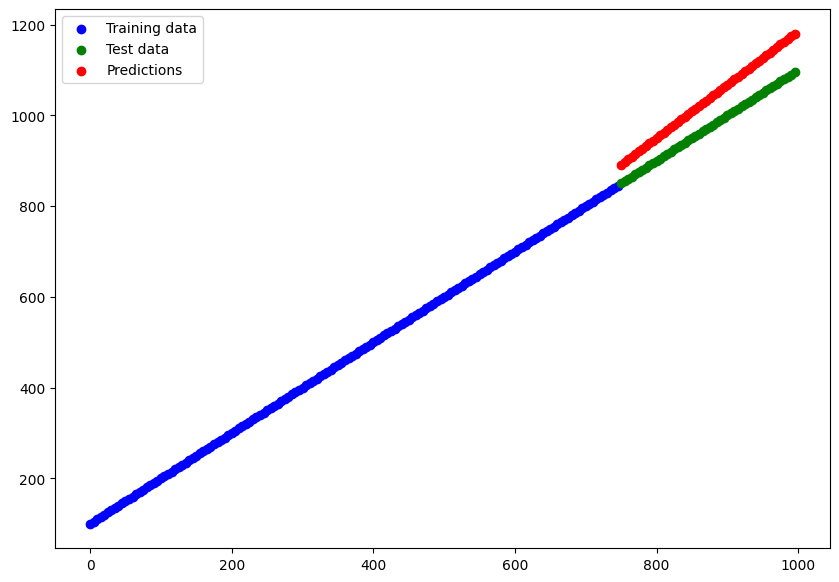

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(x_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity  

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.0291 - accuracy: 0.5021
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9553 - accuracy: 0.5004
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9371 - accuracy: 0.5013
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9060 - accuracy: 0.5031
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8741 - accuracy: 0.5008
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8601 - accuracy: 0.4995
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8444 - accuracy: 0.4991
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7456 - accuracy: 0.5004
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6569 - accuracy: 0.4988
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5710 - accuracy: 0.4985
Epoch 11/

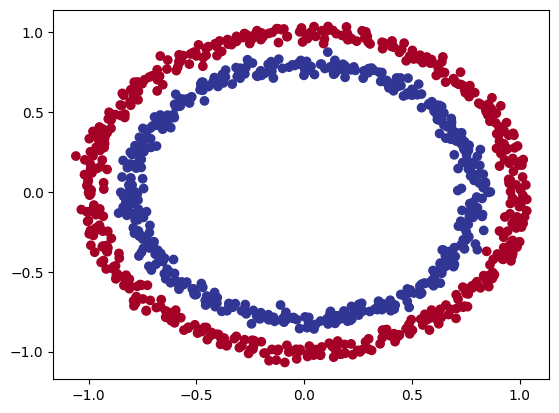

In [23]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classfication


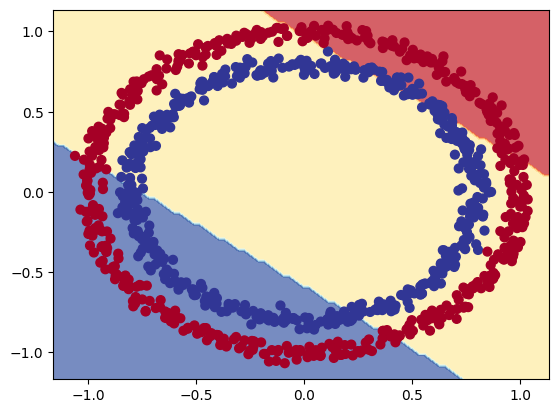

In [24]:
# Check the predictions for our latest model
plot_dicision_boundary(model_4, x, y)

In [25]:
tf.random.set_seed(42)

model_5 =tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.0017 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8617 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6549 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6104 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5593 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5385 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5205 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5116 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5063 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5023 - accuracy: 0.4730
Epoch 11/

In [26]:
# Time to replicate the multi-layer neural network from TesorFlow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


history = model_6.fit(x, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.0405 - accuracy: 0.4910
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8962 - accuracy: 0.3860
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.3350
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.3610
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.3650
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.3370
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7810 - accuracy: 0.3420
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7711 - accuracy: 0.3320
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7616 - accuracy: 0.3350
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7541 - accuracy: 0.3400
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9860


[0.045732904225587845, 0.9860000014305115]

313/313 [==============================] - 1s 2ms/step
doing binary classfication


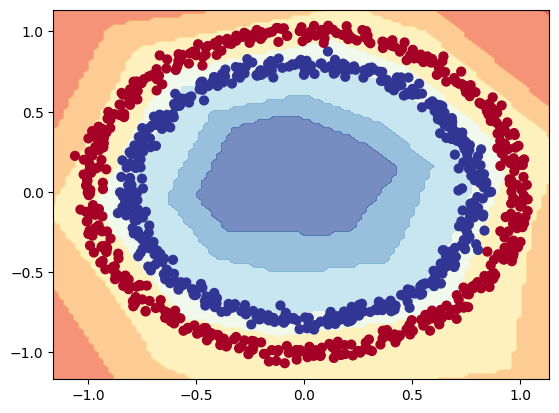

In [28]:
# Let's look at how our model did
plot_dicision_boundary(model_6, x, y)

In [46]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7043 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4950
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4970
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5020
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5030
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5010
Epoch 11/

In [47]:
# Evaluate the model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.9630


[0.3100874722003937, 0.9629999995231628]

313/313 [==============================] - 0s 1ms/step
doing binary classfication


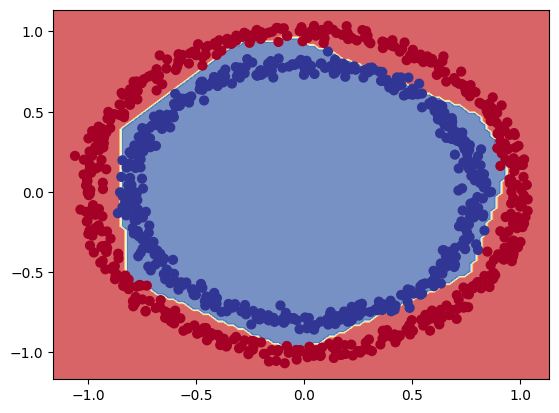

In [48]:
plot_dicision_boundary(model_7, x, y)

In [32]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Let's plot it

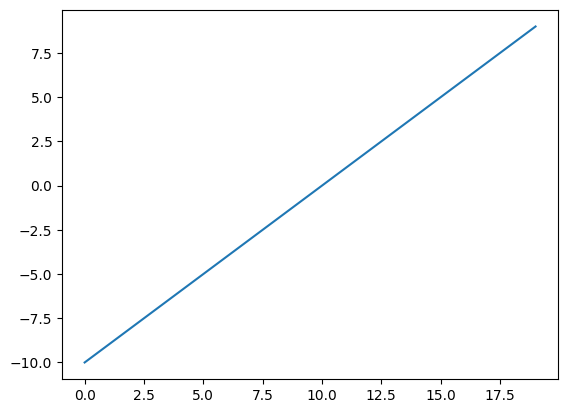

In [33]:
plt.plot(A);

 now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [34]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tesor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

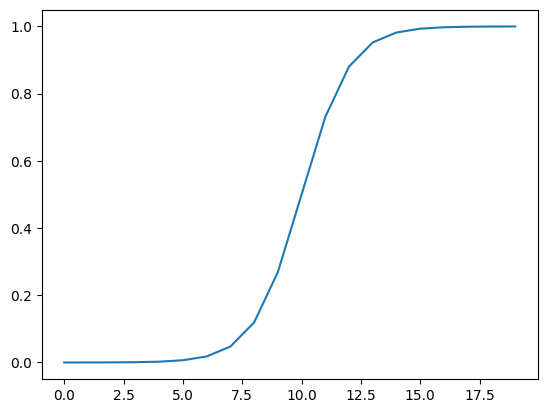

In [35]:
plt.plot(sigmoid(A));

In [36]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

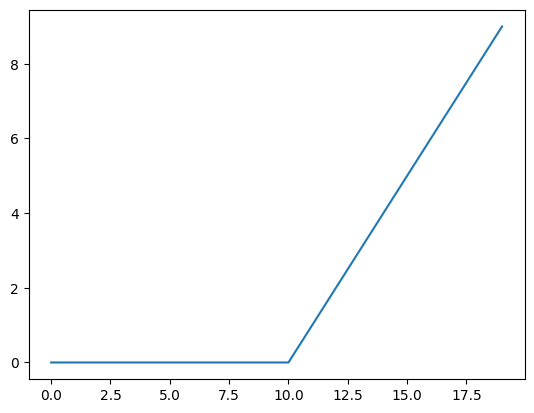

In [37]:
plt.plot(relu(A));

In [38]:
# Let's try the linera activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

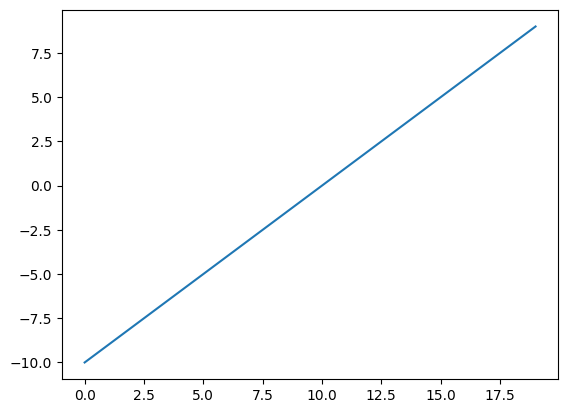

In [39]:
plt.plot(tf.keras.activations.linear(A));

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classfication

So far we have been training and testing on the same dataset
in machine learning this basically a sin
So let's create a training and test set

In [41]:
# Check how many examples we have

len(x)

1000

In [42]:
x_train , y_train = x[:800], y[:800]
x_test , y_test = x[800:], y[800:]

# Check the shape of the data
x_train.shape, x_test.shape

((800, 2), (200, 2))

In [43]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.4850
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5113
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5775
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5288
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5337
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5312
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5412
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.5575
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6225
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6675
Epoch 11/25
25/25 [

In [44]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9950


[0.10286327451467514, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classfication
313/313 [==============================] - 1s 2ms/step
doing binary classfication


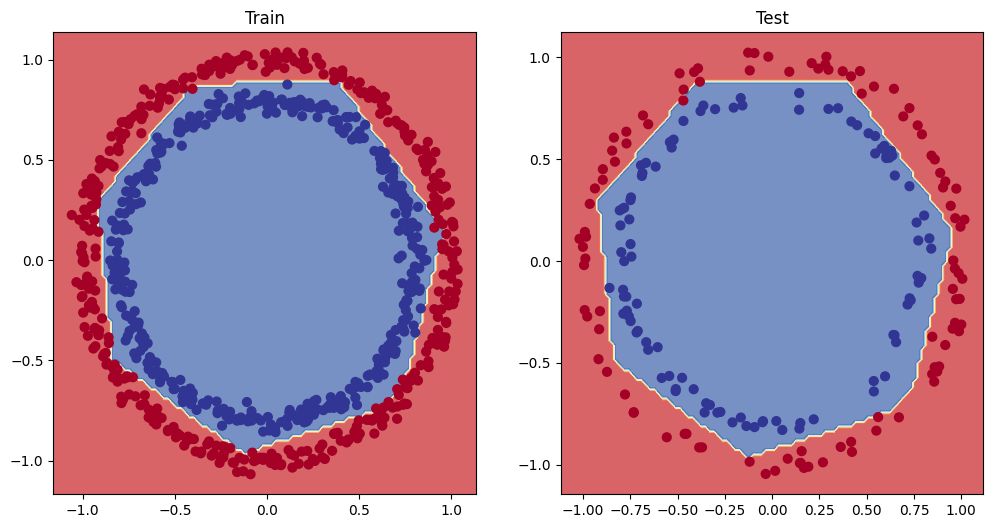

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_dicision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_dicision_boundary(model_8, x=x_test, y=y_test)
plt.show()

## Plot the loss curves

In [50]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.704283,0.502
1,0.700623,0.488
2,0.698167,0.496
3,0.696421,0.499
4,0.695217,0.495
...,...,...
95,0.330858,0.963
96,0.326023,0.963
97,0.321671,0.963
98,0.317855,0.966


Text(0.5, 1.0, 'Model_8 loss curves')

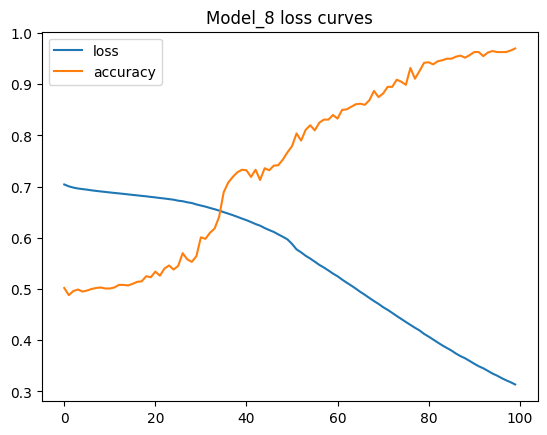

In [51]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

In [56]:
from keras.src.optimizers.schedules import learning_rate_schedule
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[learning_rate_schedule])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4787 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4863 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4863 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4863 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

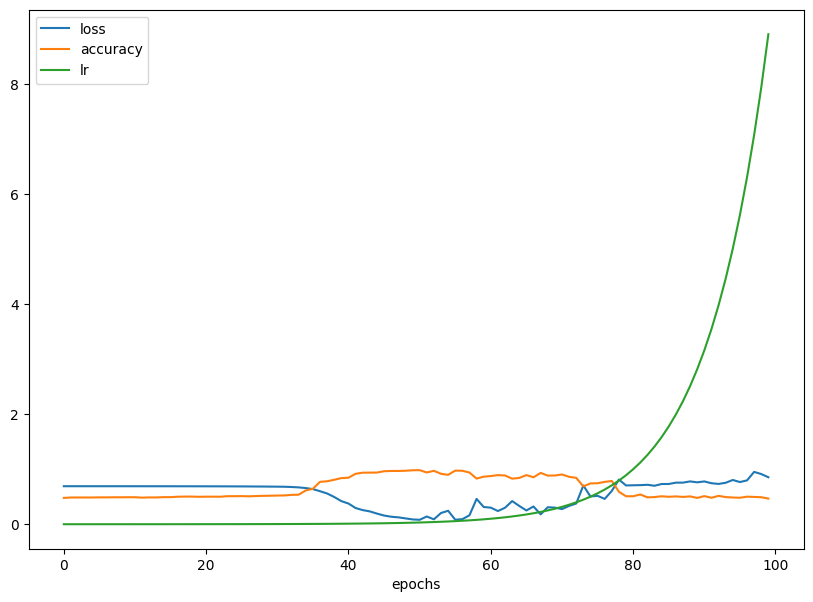

In [57]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs loss')

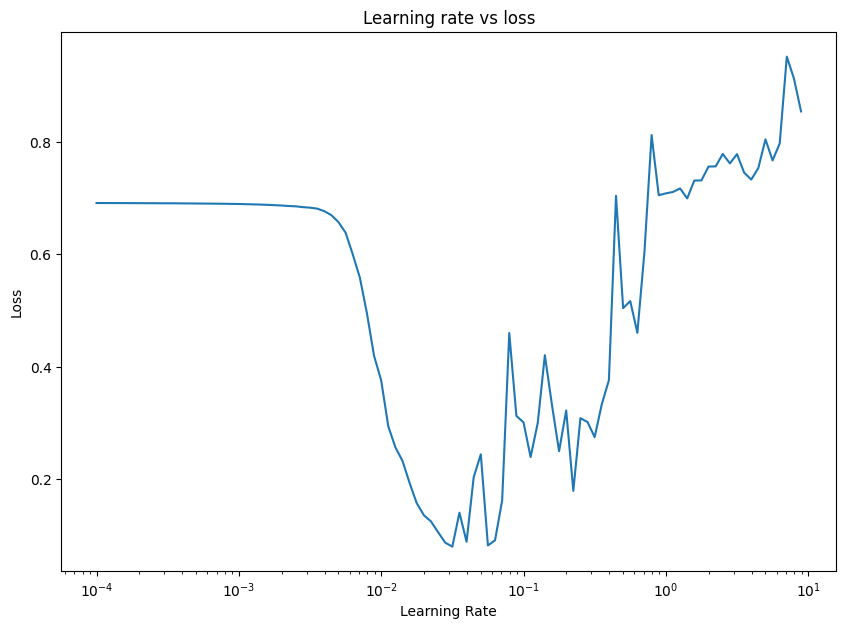

In [60]:
# Plot the learning rate versus the loss

learning_rate_schedule = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(learning_rate_schedule, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [61]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [64]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 3s 7ms/step - loss: 0.6874 - accuracy: 0.5437
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.6000
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.5500
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.5888
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.6025
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6762
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7287
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7750
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5029 - accuracy: 0.7788
Epoch 10/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 0.8338
Epoch 11/20
25/25 [

In [65]:
# Evaluate model 10 on the test dataset
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0725 - accuracy: 0.9850


[0.07251221686601639, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classfication
313/313 [==============================] - 0s 1ms/step
doing binary classfication


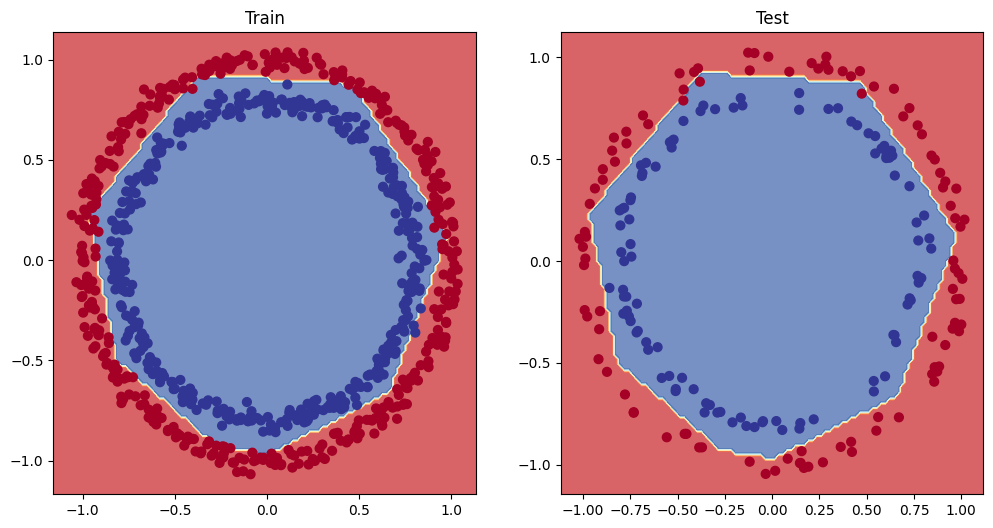

In [66]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_dicision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_dicision_boundary(model_10, x=x_test, y=y_test)
plt.show()

## More classfication evaluation methods
Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [67]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0725 - accuracy: 0.9850
Model loss on the test set: 0.07251221686601639
Model accuracy on the test set: 98.50%


How about a confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [69]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [70]:
y_preds[:10]

array([[0.9512369 ],
       [0.9795547 ],
       [0.9902098 ],
       [0.98794407],
       [0.7210107 ],
       [0.2171323 ],
       [0.9342444 ],
       [0.24976912],
       [0.993957  ],
       [0.02357642]], dtype=float32)